In [1]:
# Change the file directories and image paths accordingly when using in kaggle

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [5]:
 # useful for getting number of classes
folders = glob('DS1/Dataset/Train/*')
folders

['DS1/Dataset/Train\\Parasite', 'DS1/Dataset/Train\\Uninfected']

In [6]:
# my layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
#Now we create the base model
model = Model(inputs = vgg.input, outputs = prediction)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
#Time to compile the model
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"]
)

In [10]:
# The below written code is if you want to create a model from scratch

# from tensorflow.keras.layers import MaxPool2D

# model=Sequential()
# model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(500,activation="relu"))
# model.add(Dense(2,activation="softmax"))
# model.summary()

In [11]:
 #Use the Image Data Generator to import images from the dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
#Make sure you provide the same target size as initialised for the image

training_set = train_datagen.flow_from_directory("DS1/Dataset/Train/",
                                                target_size=(224,224),
                                                batch_size=2,
                                                class_mode="categorical")

test_set = test_datagen.flow_from_directory("DS1/Dataset/Test/",
                                           target_size=(224,224),
                                           batch_size=2,
                                           class_mode="categorical")

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [13]:
#Now we fit the model
hist = model.fit_generator(training_set,
                 validation_data=test_set,
                 epochs=2,
                 steps_per_epoch=len(training_set),
                 validation_steps=len(test_set)
)

Epoch 1/2


C:\Users\rohan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


208/208 [==============================] - 43s 207ms/step - loss: 1.5696 - accuracy: 0.6178 - val_loss: 2.1308 - val_accuracy: 0.4627
Epoch 2/2
208/208 [==============================] - 42s 201ms/step - loss: 0.8235 - accuracy: 0.7596 - val_loss: 0.2913 - val_accuracy: 0.8582


In [14]:
#The below code is to check if system gpu is being used or not to execute the model
import tensorflow as tf

if tf.test.gpu_device_name():
    print("Default gpu device:".format*(tf.test.gpu_device_name()))
else:
    print("Please install gpu version of tf")

Please install gpu version of tf


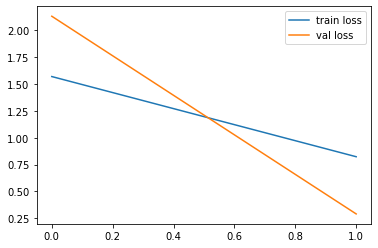

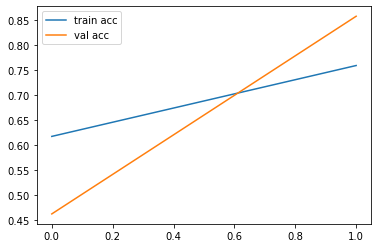

<Figure size 432x288 with 0 Axes>

In [42]:
# loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
hist.history

{'loss': [1.5695650577545166, 0.8235195875167847],
 'accuracy': [0.6177884340286255, 0.7596153616905212],
 'val_loss': [2.1307926177978516, 0.2912573218345642],
 'val_accuracy': [0.46268656849861145, 0.858208954334259]}

In [18]:
model.save('model_vgg19.h5')

In [19]:
y_pred = model.predict(test_set)
y_pred

array([[5.05625010e-01, 4.94374961e-01],
       [9.99997973e-01, 2.03070363e-06],
       [2.53562152e-01, 7.46437848e-01],
       [2.35211760e-01, 7.64788210e-01],
       [5.33914983e-01, 4.66085047e-01],
       [5.40371314e-02, 9.45962906e-01],
       [9.99798715e-01, 2.01283605e-04],
       [9.99993563e-01, 6.39585414e-06],
       [5.08360267e-01, 4.91639733e-01],
       [9.71090376e-01, 2.89096367e-02],
       [6.38537407e-01, 3.61462593e-01],
       [6.81882262e-01, 3.18117678e-01],
       [9.29061711e-01, 7.09382594e-02],
       [2.76450396e-01, 7.23549664e-01],
       [3.07103526e-02, 9.69289660e-01],
       [2.13646948e-01, 7.86352992e-01],
       [9.96611774e-01, 3.38825001e-03],
       [9.99807417e-01, 1.92575710e-04],
       [1.06816828e-01, 8.93183231e-01],
       [6.87284350e-01, 3.12715650e-01],
       [6.21384196e-02, 9.37861562e-01],
       [8.80920351e-01, 1.19079672e-01],
       [7.97156513e-01, 2.02843472e-01],
       [1.90193206e-01, 8.09806824e-01],
       [4.533566

In [20]:
y_preds = np.argmax(y_pred, axis=1)
y_preds

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1], dtype=int64)

In [21]:
# yoo=y_preds
# yoo=np.argmax(model.predict(img_data), axis=1)
# if (yoo==1):
#     print("Uninfected")
# else:
#     print("Infected")

In [22]:
#now we read the image and predict the outcome of the image given

from tensorflow.keras.models import load_model
model = load_model("model_vgg19.h5")

In [43]:
from tensorflow.keras.preprocessing import image
img=image.load_img('DS1/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105803_cell_79.png',target_size=(224,224))

In [44]:
#Now we need to convert the image into an array for the model to be able to read it
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [45]:
x.shape

(224, 224, 3)

In [46]:
#We do this step to rescale in the same way we divided our test_datagen and train_datagen by 255
x=x/255

In [47]:
#Now we expand the dimensions of this image for it to be of the same shape
x = np.expand_dims(x, axis=0)
#If in case you run line 2 more than once the shape will change with 1 more dimension every time
#To fix this use "squeeze" in place of "expand_dims" and run and check the final shape of image
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [48]:
model.predict(img_data)

array([[2.2119104e-07, 9.9999976e-01]], dtype=float32)

In [49]:
a=np.argmax(model.predict(img_data), axis=1)

In [50]:
if (a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
